<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Lab_10_%5BSOLUTIONS%5D_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #10: ML Ethics - Analyzing UCI's Adult Data Set** 
---

### **Description**: 
In this lab, we will analyze UCI's Adult Data set and explore ethical issues with the dataset and models created from it, as well as attempt to mitigate any bias we find. Then, we will explore Amazon's Clarify.


### **Lab Structure**
**Part 1**: [Using Visualizations to Identify Bias](#p1)
**Part 2**: [Using AWS Clarify to Identify Bias](#p2)
**Part 3**: [Mitigating Bias](#p3)


</br>


### **Goals:** 
By the end of this lab, you will be able to:
* Explain why imbalanced data can lead to bias in models.
* You will be able to identify bias through different means like data exploration and using AWS Clarify.
* Mitigate bias in data once you have found it using several different approaches.


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
#!pip install scikit-learn
!pip install --quiet smclarify

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from smclarify.bias.report import *

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Using Visualizations to Identify Bias**
---

We will be exploring UCI's [Adult Data Set](https://archive-beta.ics.uci.edu/ml/datasets/adult) and the bias inherent within it. This data was intended to inspect incomes over $50K based on census data in 1994, but as we will discover, there are some pitfalls with this data set. The following table will provide a description of what each column in the data set represents.

<br>

**NOTE:** This data set was derived from 'Census Data'. For this project, we are assuming this refers to the US Census Data for the year 1994. Our comparisons for visualizations reflect this assumption.

<br>

**Run the cell below to load the data.**

In [ ]:
url = "https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data" #"https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data" 
names=["Age", "Workclass", "Final-Weight", "Education", "Education-number-of-years", "Marital-status",
        "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss",
        "Hours-per-week", "Native-country", "Target"]
        
adult = pd.read_csv(url, names = names)
adult = adult.dropna()
adult.head()

,Age,Workclass,Final-Weight,Education,Education-number-of-years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Problem #1: Sex Distribution**
---
Complete the code below to create a bar graph for the sex distribution in this dataset. What do you notice in the visualization?

In [ ]:
sex_labels = adult["Sex"].# COMPLETE THIS LINE
sex_counts = adult["Sex"].# COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title('Sex Distribution in the Data', fontweight = 'bold')
plt.xlabel('Sex', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')

plt.show()

#### **Solution**

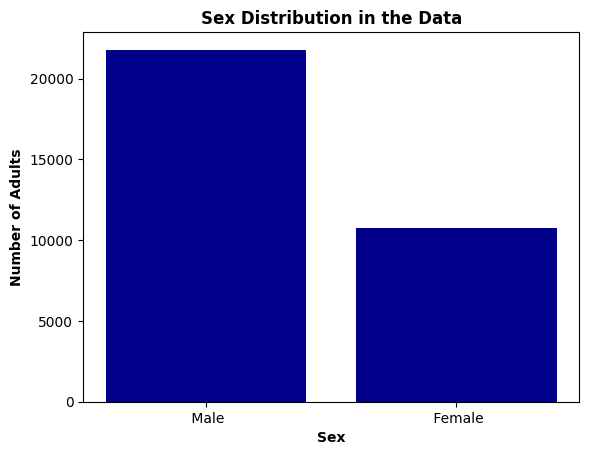

In [ ]:
sex_labels = adult["Sex"].unique()
sex_counts = adult["Sex"].value_counts()

plt.bar(sex_labels, sex_counts, color = 'darkblue')

plt.title('Sex Distribution in the Data', fontweight = 'bold')
plt.xlabel('Sex', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')

plt.show()

***You may have noticed that there is approximately double the amount of males than females in our data. This is a big red flag. If the data were truly representative of the US population in 1994, there would actually be 50.9% females compared to the 49.1% of males.***

### **Problem #2: Race Distribution**
---
Complete the code below to create a bar graph for the race distribution in this dataset. What do you notice in the visualization?

<br>

Consider using the following when creating your graph to make the x-ticks more readable: `plt.xticks(rotation = 45)`.

In [ ]:
race_labels = # COMPLETE THIS LINE
race_counts = # COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title(# COMPLETE THIS LINE
plt.xlabel(# COMPLETE THIS LINE
plt.ylabel(# COMPLETE THIS LINE
plt.xticks(# COMPLETE THIS LINE

plt.show()

#### **Solution**

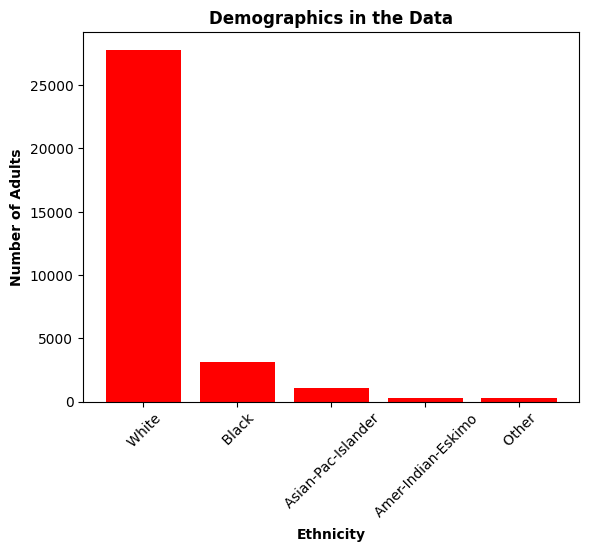

In [ ]:
race_labels = adult["Race"].unique()
race_counts = adult["Race"].value_counts()

plt.bar(race_labels, race_counts, color = 'red')

plt.title('Demographics in the Data', fontweight = 'bold')
plt.xlabel('Ethnicity', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

***This part of the data is also off! In the 1990s, approximately 80% of the population was white; 12% black; 1% American Indian, Eskimo, and Aleut; 3% Asian Pacific Islander; and the final 4% falling under the 'other' category. Our visual shows approximately 85% white, 10% black, and the remainder other minorities. While this ratio is not off by as large of amount as it was for the sex distribution, this data is still misrepresenting the US population.***

### **Problem #3: Education Distribution**
---
Create a bar graph for the education distribution in this dataset. What do you notice in the visualization?

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

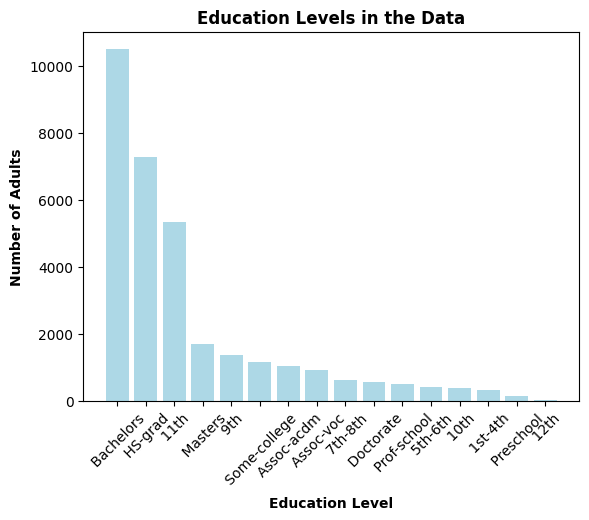

In [ ]:
education_labels = adult["Education"].unique()
education_counts = adult["Education"].value_counts()

plt.bar(education_labels, education_counts, color = 'lightblue')

plt.title('Education Levels in the Data', fontweight = 'bold')
plt.xlabel('Education Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

***The number of highschool graduates is more than 33% compared to college graduates and almost 50% more compared to individuals with bachelor's degrees***

### **[OPTIONAL] Problem #4: Education Distribution Revised**
---

Modify your solution from above so that the counts for:
* `1st-4th` and `5th-6th` are grouped under a new label: `Elementary`.
* `9th`, `10th`, `11th`, `12th` are grouped under a new label: `High School`.

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

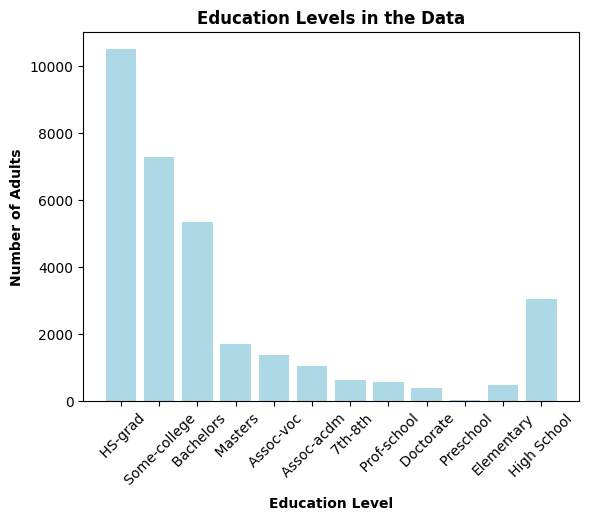

In [ ]:
education_dict = adult["Education"].value_counts().to_dict()

# Group all elementary
education_dict["Elementary"] = 0
for value in [' 1st-4th', ' 5th-6th']:
    education_dict["Elementary"] += education_dict.pop(value)

# Group all High School
education_dict["High School"] = 0
for value in [' 9th', ' 10th', ' 11th', ' 12th']:
    education_dict["High School"] += education_dict.pop(value)

education_labels = education_dict.keys()
education_counts = education_dict.values()


plt.bar(education_labels, education_counts, color = 'lightblue')

plt.title('Education Levels in the Data', fontweight = 'bold')
plt.xlabel('Education Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

### **Problem #5: Income Distribution**
---

Create a bar graph for the target (income above or below 50K). What do you notice?

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

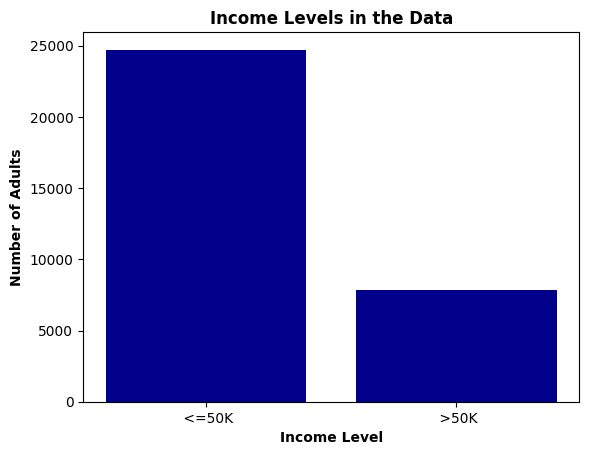

In [ ]:
target_labels = adult["Target"].unique()
target_counts = adult["Target"].value_counts()

plt.bar(target_labels, target_counts, color = 'darkblue')

plt.title('Income Levels in the Data', fontweight = 'bold')
plt.xlabel('Income Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')

plt.show()

***While we do not have as much information about the exact values of earnings for the year 1994, we must remember that this is our target data. It would be ideal to have equal amounts of both categories for our model.***

### **Problem #6: Target by Sex**
---

Create a new feature, `Target by Sex`, that designates any person with:
* `Target` of `' <=50K'` and `Sex` of `' Male'` as `'Male <=50K'`.
* `Target` of `' <=50K'` and `Sex` of `' Female'` as `'Female <=50K'`.
* `Target` of `' >50K'` and `Sex` of `' Male'` as `'Male >50K'`.
* `Target` of `' >50K'` and `Sex` of `' Female'` as `'Female >50K'`.


Then create a bar plot of this feature.

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

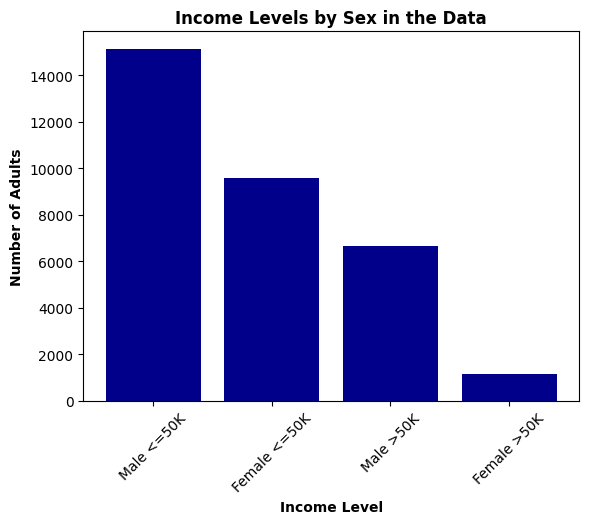

In [ ]:
adult.loc[(adult['Target'] == ' <=50K') & (adult['Sex'] == ' Male'), 'Target by Sex'] = 'Male <=50K'
adult.loc[(adult['Target'] == ' <=50K') & (adult['Sex'] == ' Female'), 'Target by Sex'] = 'Female <=50K'
adult.loc[(adult['Target'] == ' >50K') & (adult['Sex'] == ' Male'), 'Target by Sex'] = 'Male >50K'
adult.loc[(adult['Target'] == ' >50K') & (adult['Sex'] == ' Female'), 'Target by Sex'] = 'Female >50K'

target_by_sex_labels = adult["Target by Sex"].unique()
target_by_sex_counts = adult["Target by Sex"].value_counts()

plt.bar(target_by_sex_labels, target_by_sex_counts, color = 'darkblue')

plt.title('Income Levels by Sex in the Data', fontweight = 'bold')
plt.xlabel('Income Level', fontweight = 'bold')
plt.ylabel('Number of Adults', fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

***This visual is extremely important. If we were to use sex in our model, we could easily be overfitting to the female population since our dataset for that section is much smaller than the rest of the data. Furthermore, there is not even 2,000 data points for females earning over 50K (less than 6% of our data).***

<a name="p2"></a>

---
## **Part 2: Using AWS Clarify to Identify Bias**
---

In this section, we are going to use Clarify to identify bias. This method is *much faster* than creating bar graphs for every column.

Here is a AWS Clarify [cheatsheet](https://docs.google.com/document/d/1SPnA_Bqewm3tG2gLF_SmG2DIKdm9Jinm1cRBoURv1yw/edit?usp=sharing) for interpretting results.

<br>

**NOTE**: Steps #1 - 2 have already been taken care of above.

### **Step #3: Denote the facet column, the label column, and the group variable.**
---

Set the:
* Facet column as `Sex`.
* Label column with `Target` as the target column and `' >50K'` as the positive label.
* `Sex` as the group variable.

In [ ]:
facet_column = FacetColumn(# COMPLETE THIS LINE
label_column = LabelColumn(# COMPLETE THIS LINE
group_variable = # COMPLETE THIS LINE

#### **Solution**

In [ ]:
facet_column = FacetColumn('Sex')
label_column = LabelColumn('Target', adult['Target'], [' >50K'])
group_variable = adult['Sex']

### **Step #4: Generate bias report.**
---
Check out this [cheatsheet](https://docs.google.com/document/d/1SPnA_Bqewm3tG2gLF_SmG2DIKdm9Jinm1cRBoURv1yw/edit?usp=sharing) for how to interpret pre-training metrics. Using this page, interpret what the following report is saying.

<br>

**Run the cell below to generate your bias report.**

In [ ]:
report = bias_report(adult, facet_column, label_column, stage_type=StageType.PRE_TRAINING, group_variable=group_variable)

# use this to print your report - call it "report" for the code to work
for cl in report:
    print("\n\n","-"*35)
    print("-"*15, cl["value_or_threshold"], "-"*15)
    for metric in cl['metrics']:
        print(f"{metric['description']}: {metric['value']}")



 -----------------------------------
---------------  Male ---------------
Conditional Demographic Disparity in Labels (CDDL): 0.0
Class Imbalance (CI): -0.33841098246368356
Difference in Positive Proportions in Labels (DPL): -0.19627598779361352
Jensen-Shannon Divergence (JS): 0.030241092804852217
Kullback-Liebler Divergence (KL): 0.10928938730742264
Kolmogorov-Smirnov Distance (KS): 0.19627598779361355
L-p Norm (LP): 0.27757616390590434
Total Variation Distance (TVD): 0.19627598779361355


 -----------------------------------
---------------  Female ---------------
Conditional Demographic Disparity in Labels (CDDL): 0.0
Class Imbalance (CI): 0.33841098246368356
Difference in Positive Proportions in Labels (DPL): 0.19627598779361352
Jensen-Shannon Divergence (JS): 0.030241092804852217
Kullback-Liebler Divergence (KL): 0.14118531053076427
Kolmogorov-Smirnov Distance (KS): 0.19627598779361355
L-p Norm (LP): 0.27757616390590434
Total Variation Distance (TVD): 0.19627598779361355


### **Step #5 Look at the imbalance.**
---

Use the [cheatsheet](https://docs.google.com/document/d/1SPnA_Bqewm3tG2gLF_SmG2DIKdm9Jinm1cRBoURv1yw/edit?usp=sharing) provided to interpret what the bias report is telling you. 

In [ ]:
# Write Male Results here

In [ ]:
# Write Female Results

####**Solution**

**Male**
* CDD - no demographic disparity
* CI - has more training samples
* DPL - higher proportion of positive outcomes
* JS - similarly distributed labels
* KL - diverge (but not by a lot)
* KS - relative imbalance
* LP - diverge
* TVD - not very similarly distributed

<br>

**Female**
* CDD - no demographic disparity
* CI - has fewer training samples
* DPL - lower proportion of positive outcomes
* JS - similarly distributed labels
* KL - diverge (but not by a lot)
* KS - relative imbalance
* LP - diverge
* TVD - not very similarly distributed

<a name="p3"></a>

---
## **Part 3: Mitigating Bias**
---
In this section, we will implement a KNN model before and after using different techniques for mitigating bias.

### **Problem #1: Convert `Sex` to numerical values.**

We need to convert any non-numerical binary values into numerical ones that can be used by our model. Specifically convert,
* `Sex` from `' Female'` and `' Male'` to 0 and 1 respectively.

<br>

**NOTE**: There are several ways you could do this that you have learned, including label encoding.

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

In [ ]:
sex_map = {' Female': 0, ' Male': 1}

adult['Sex'] = adult['Sex'].map(sex_map)

adult.head()

,Age,Workclass,Final-Weight,Education,Education-number-of-years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K


### **Problem #2: Dummy variable encode non-numerical categorical variables.**

Dummy variable encode the following non-numerical categorical variables:
* `Workclass`
* `Education`
* `Marital-status`
* `Occupation`
* `Relationship`
* `Race`
* `Native-country`

<br>

**NOTE**: Now that you have seen how to do this in yesterday's lab, you can use just one `OneHotEncoder` to transform all these variables at once.

In [ ]:
# Create the new dataframe
new_adult = adult.drop(columns = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Native-country', 'Target by Sex'], axis = 1)

# Create the encoder and transform the desired columns
ohe = OneHotEncoder(drop = 'first', sparse_output = False)
ohe.set_output(transform = 'pandas')

transformed = ohe.fit_transform(adult[[# COMPLETE THIS LINE BY LISTING ALL COLUMNS TO ENCODE

# Create the new dataframe
new_adult[# COMPLETE THIS LINE


new_adult.head()

#### **Solution**

In [ ]:
# Create the new dataframe
new_adult = adult.drop(columns = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Native-country', 'Target by Sex'], axis = 1)

# Create the encoder and transform the desired columns
ohe = OneHotEncoder(drop = 'first', sparse_output = False)
ohe.set_output(transform = 'pandas')

transformed = ohe.fit_transform(adult[['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Native-country']])

# Create the new dataframe
new_adult[transformed.columns] = transformed


new_adult.head()

,Age,Final-Weight,Education-number-of-years,Sex,Capital-gain,Capital-loss,Hours-per-week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,1,2174,0,40,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,1,0,0,13,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,1,0,0,40,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,1,0,0,40,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,0,40,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Problem #3: Prepare the data for modeling.**
---

Specifically,
* Decide the independent and dependent variables (only including numerical variables).
* Split the data into train and test sets such that 20% is left for testing.
* Scale your data.


In [ ]:
# Decide the independent and dependent variables
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

# Scale your data
scaler = # COMPLETE THIS LINE

X_train_scaled = scaler.# COMPLETE THIS LINE
X_test_scaled = scaler.# COMPLETE THIS LINE

#### **Solution**

In [ ]:
# Decide the independent and dependent variables
features = new_adult.drop(columns = ['Target'], axis = 1)
label = new_adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Problem #3: Initialize and train your model.**
---

Use a KNN model with K = 5.

In [ ]:
knn = # COMPLETE THIS LINE
knn. # COMPLETE THIS LINE

#### **Solution**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### **Problem #4: Make predictions for the standardized test data.**
---

In [ ]:
y_pred = # COMPLETE THIS LINE

###### **Solution**

In [ ]:
y_pred = knn.predict(X_test_scaled)

### **Problem #5: Evaluate your model.**
---

Specifically,
* Print the accuracy score.
* Plot the confusion matrix.

<br>

**NOTE**: Since we are using `type1` as the label directly here, we just use `display_labels=clf.classes_`. This is one good reason for using non-encoded labels.

In [ ]:
# Print the accuracy score
accuracy = # COMPLETE THIS LINE
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Solution**

Accuracy: 0.8223552894211577


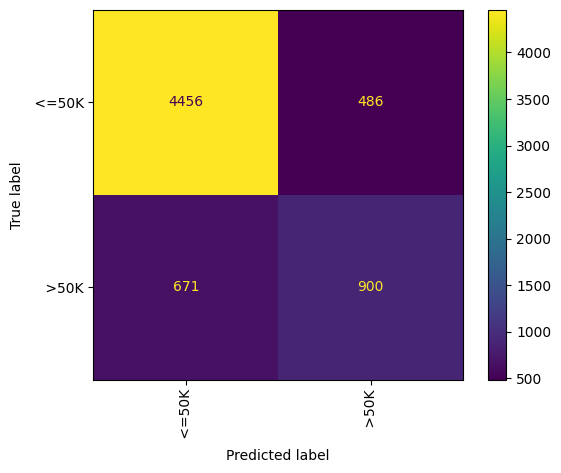

In [ ]:
# Print the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #6: Mitigating bias by blinding.**
---

This method involves just *removing* sex as an input for our model. The hope is that by blinding our model to a feature we have explicitly shown to be biased in the previous Parts, we can remove this bias.

<br>

**NOTE**: Although it is often one of the first thoughts, blinding to bias is not considered good practice! There are patterns in the data correlated to the removed features that mean we have not really removed the bias. In fact, this can be even more problematic since we believe we have mitigated the bias and take the results more seriously, when in fact the results still reflect biases.

In [ ]:
# Decide the independent and dependent variables
features = new_adult.drop(# COMPLETE THIS LINE SUCH THAT 'Sex' IS NOT A FEATURE
label = new_adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

# Scale your data
scaler = # COMPLETE THIS LINE

X_train_scaled = # COMPLETE THIS LINE
X_test_scaled = # COMPLETE THIS LINE


# Initialize and train your model
knn = # COMPLETE THIS LINE
knn.# COMPLETE THIS LINE


# Make predictions for the standardized test data
y_pred = knn.# COMPLETE THIS LINE


# Evaluate your model
# Print the accuracy score
accuracy = # COMPLETE THIS LINE
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Solution**

Accuracy: 0.8194380469829572


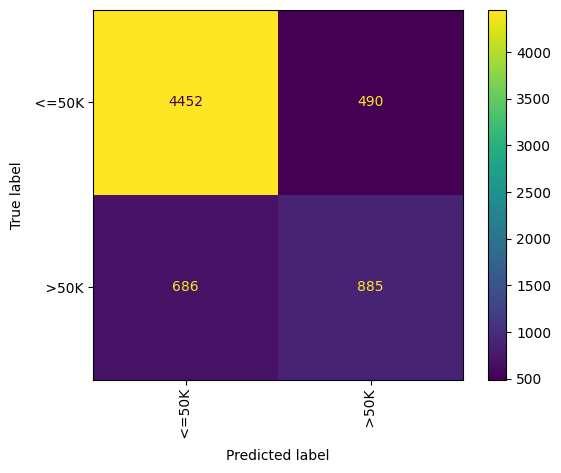

In [ ]:
# Decide the independent and dependent variables
features = new_adult.drop(columns = ['Target', 'Sex'], axis = 1)
label = new_adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train your model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)


# Make predictions for the standardized test data
y_pred = knn.predict(X_test_scaled)


# Evaluate your model
# Print the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #7: Mitigate bias by balancing.**
---

This method involves making the data distribution more equal. In this step, we will balance the sex distribtuion by ensuring there are equal amount of data points for male and female entries being used in our model.

<br>

**Run the cell below to create this balanced dataset.**

In [ ]:
# get two data frames by sex
females, males = new_adult.query("Sex == 0"), new_adult.query("Sex == 1")

# make the males the minimum between females and males
sampled_males = males.sample(n=int(min(females.shape[0], males.shape[0]))).reset_index(drop=True)

# combine
balanced_adult = pd.concat([sampled_males, females]).sample(frac=1).reset_index(drop=True)

In [ ]:
# Decide the independent and dependent variables
features = balanced_adult.drop(# COMPLETE THIS LINE
label = balanced_adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

# Scale your data
scaler = # COMPLETE THIS LINE

X_train_scaled = # COMPLETE THIS LINE
X_test_scaled = # COMPLETE THIS LINE


# Initialize and train your model
knn = # COMPLETE THIS LINE
knn.# COMPLETE THIS LINE


# Make predictions for the standardized test data
y_pred = knn.# COMPLETE THIS LINE


# Evaluate your model
# Print the accuracy score
accuracy = # COMPLETE THIS LINE
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Solution**

Accuracy: 0.8396379670457182


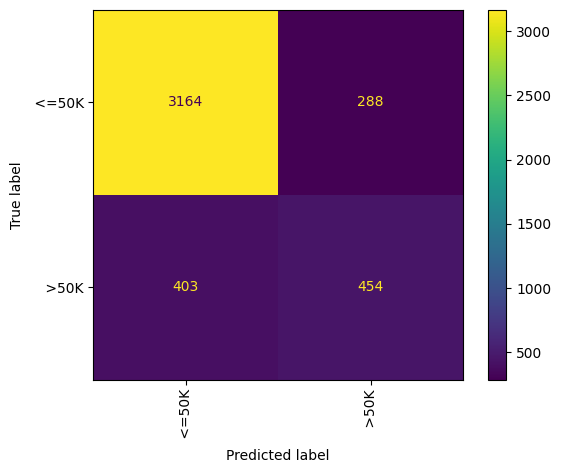

In [ ]:
# Decide the independent and dependent variables
features = balanced_adult.drop(columns = ['Target', 'Sex'], axis = 1)
label = balanced_adult['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train your model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)


# Make predictions for the standardized test data
y_pred = knn.predict(X_test_scaled)


# Evaluate your model
# Print the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

**This should have been your most accurate model and it has made an honest attempt to mitigate (instead of blinding ourselves to) bias.**

# End of Lab

---
© 2023 The Coding School, All rights reserved